## Overview

The `distributions` module offers a number of common theoretical and empirical distributions used in polymerization kinetics. 


| Class      | Required arguments | Optional arguments |   Category  |        Also known as        |
|------------|:------------------:|:------------------:|:-----------:|:---------------------------:|
| Flory      |         DPn        |      M0, name      | theoretical | Schulz-Flory, most-probable |
| Poisson    |         DPn        |      M0, name      |  theortical |              --             |
| LogNormal  |      DPn, PDI      |      M0, name      |  empirical  |              --             |
| SchulzZimm |      DPn, PDI      |      M0, name      |  empirical  |      Gamma distribution     |

All distributions have the number-average degree of polymerization (`DPn`) as first required positional argument. Additionally, the `LogNormal` and `SchulzZimm` distributions take the polydispersity index (`PDI`) as second required positional argument. The average molar-mass of the repeating units (`M0`) and the distribution name (`name`) are optional keyword arguments.

To instantiate a distribution, we just call the respective class constructor with the desired argument values.

In [1]:
from polykin.distributions import Flory, Poisson, LogNormal, SchulzZimm

In [2]:
# Poisson distribution with DPn=100, and implicit/default M0=100 and name=''
p = Poisson(100)
# Flory with DPn=120, and user-defined M0 and name                                
f = Flory(120, M0=65, name='polymer-F')         
# Log-Normal with DPn=150, PDI=1.5, and default M0 and name.
g = LogNormal(150, 1.5)
# Schulz-Zimm with DPn=100, PDI=3, and user-defined M0 and name                      
s = SchulzZimm(100, 3, M0=80, name='polymer-Z') 

The most important properties of a distribution can be displayed with the `print()` command.

In [3]:
print(p)

type: Poisson
name: 
DPn:  100.0
DPw:  101.0
DPz:  102.0
PDI:  1.01
M0:   100.0
Mn:   10,000
Mw:   10,099
Mz:   10,197


In [4]:
print(s)

type: SchulzZimm
name: polymer-Z
DPn:  100.0
DPw:  300.0
DPz:  500.0
PDI:  3.00
M0:   80.0
Mn:   8,000
Mw:   24,000
Mz:   40,000


The primary properties of the distribution can be modified, if desired.

In [5]:
p.DPn = 5
p.M0 = 123
p.name = 'polymerP'
print(p)

type: Poisson
name: polymerP
DPn:  5.0
DPw:  5.8
DPz:  6.5
PDI:  1.16
M0:   123.0
Mn:   615
Mw:   713
Mz:   802


Any of these properties can be accessed by its name.

In [6]:
p.Mz

801.6206896551724

Additionally, the moments of order 0-3 can be evaluated with the `moment()` method.

In [7]:
p.moment(3)/p.moment(2) # compare to DPz

6.517241379310345

In [8]:
p.moment(3, 'mass')/p.moment(2, 'mass') # compare to Mz

801.6206896551724

## Plot a distribution

The class method `plot()` allows for a quick visualization of the corresponding _number_, _mass_ or _GPC_ probability density function (pdf). If no arguments are specified, the mass pdf is displayed.

<AxesSubplot: xlabel='Chain length', ylabel='Relative abundance'>

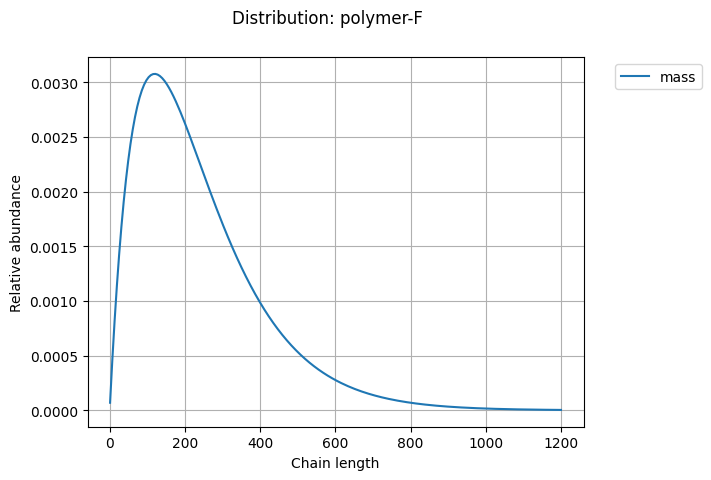

In [9]:
f.plot()

Many other types of plots can be generated. For example, we can draw a plot overlaying the number and mass pdf, with an x-axis based on molar mass rather than chain-length.

<AxesSubplot: xlabel='Molar mass', ylabel='Relative abundance'>

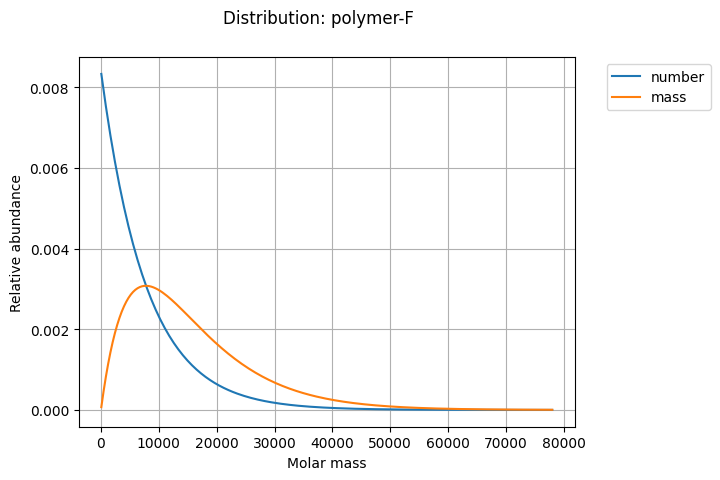

In [10]:
f.plot(['number','mass'], sizeas='mass')

If we select a GPC-type plot, the x-axis scale is automatically switched to 'log'.  

<AxesSubplot: xlabel='Molar mass', ylabel='Relative abundance'>

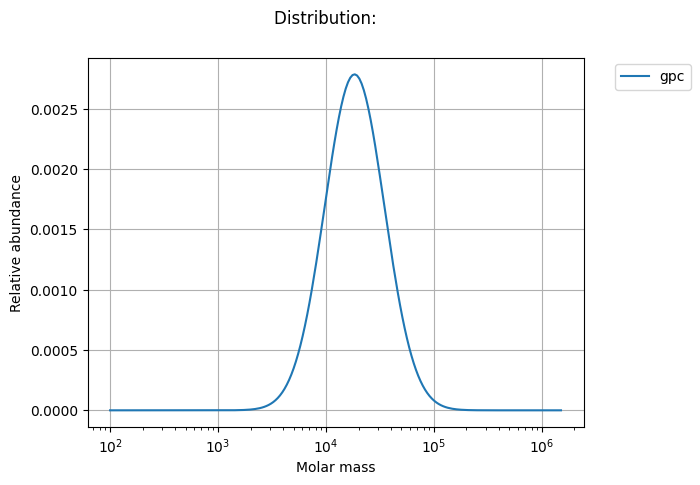

In [11]:
g.plot('gpc', sizeas='mass')

## Probability values

Probability density function (pdf) as well as cumulative density function (cfd) values can be obtained for any chain-length by using the methods `pdf()` and `cdf()`, respectively.

In [12]:
# mass pdf for a single chain-length
f.pdf(120) 

0.0030784980298821795

In [13]:
# mass pdf for a list/array of chain-lengths
f.pdf([110, 120, 130]) 

array([0.00306827, 0.0030785 , 0.00306731])

In [14]:
# number pdf for a list/array of chain molar masses
p.pdf([600, 700, 800], type='number', sizeas='mass') #

array([0.19791364, 0.17101025, 0.13008108])

The pdf and cdf values are, of course, internally consistent, as illustrated by the example below.

In [15]:
x = [i for i in range(1,6)]
pdf = p.pdf(x, type='number')
cdf = p.cdf(x[-1], type='number')
print('sum(pdf):', sum(pdf))
print('cdf:     ', cdf)

sum(pdf): 0.6288369351798734
cdf:      0.6288369351798733


## Random chain-length samples

Random samples of chain-lengths can be generated using the method `random()`.

In [16]:
p.random() # single value

5

In [17]:
p.random(5) # vector of length 5

array([7, 8, 3, 7, 5], dtype=int64)

In [18]:
g.random((3,4)) # array of shape (3,4)

array([[ 83., 162., 173., 178.],
       [ 35.,  74.,  57.,  50.],
       [133., 275., 153., 236.]])

The random values are, of course, consistent with the distribution properties, as illustrated below for DPw.

In [19]:
x = f.random(10**5)
DPw_random = sum(x**2)/sum(x)
print("DPw random:", DPw_random)
print("DPw 'true':", f.DPw)

DPw random: 239.42132774875932
DPw 'true': 239.00000000000085


## Mixture distributions

Any of the abovementioned _individual_ distributions can be combined in any proportion to obtain a resulting [mixture distribution](https://en.wikipedia.org/wiki/Mixture_distribution). This feature can be used, for instance, to compute the distribution of a polymer blend, as illustrated below.

First, let's define some sample polymer distributions.

In [20]:
a = Poisson(100, name="A")
b = Flory(200, name="B")
c = LogNormal(800, 2, name="C")

Now, we define the blend using common algebra language. The (positive) numerical factors are the mass parts used to prepare the blend.

In [21]:
blend = 0.5*a + 1*b + 0.5*c

In [22]:
print(blend)

type: MixtureDistribution
name: A+B+C
DPn:  188.2
M0:   100.0
PDI:  3.32
Mn:   18,824
Mw:   62,475
Mz:   224,407
